# Principal Component Analysis (PCA)


PCA can be used to improve the performance of clustering algorithms, as well as to reduce the computational complexity.

---
##1.&nbsp; Import libraries and files 💾

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs

from sklearn import set_config
set_config(transform_output="pandas")

In [24]:
url = "https://drive.google.com/file/d/14nr7lkB1_fF61Mba9mNgTnCeFlxBATnt/view?usp=sharing" # spotify list
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
'''
songs_original_df = pd.read_csv(path, 
                               sep=None, 
                               engine='python', 
                               quoting=3,
                               quotechar='"',
                      
                               on_bad_lines='skip', 
                     
                               skipinitialspace=bool)
'''
songs_original_df = pd.read_csv(path)


songs_original_df.columns = songs_original_df.columns.str.replace(' ', '')


to_drop=['Unnamed:0']


songs_original_df = songs_original_df.drop(columns=to_drop)  
songs_original_df = songs_original_df.drop_duplicates()


to_drop=[ 'key',
          'mode',
          'type',
          'duration_ms',
          'time_signature',
          'id',
          #'html',
          'artist',
          #'liveness',
          #'speechiness',
          #'loudness',
          #'energy',
         # 'acousticness',
          #'instrumentalness',
          #'valence',
          #'tempo',
          #'danceability'
    
         ]
        
songs_original_df = songs_original_df.drop(columns=to_drop)  
songs_original_df= songs_original_df.set_index(['name', 'html'])

songs_original_df = songs_original_df.drop_duplicates()


songs_original_df #= songs_orignal_df.head(50)

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,html,,,,,,,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.6580,0.25900,-13.141,0.0705,0.694,0.000059,0.9750,0.3060,110.376
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.7420,0.39900,-12.646,0.0346,0.217,0.000002,0.1070,0.6930,125.039
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.8510,0.73000,-11.048,0.3470,0.453,0.000063,0.1240,0.9050,93.698
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.7050,0.05020,-18.115,0.0471,0.879,0.000041,0.3860,0.5240,106.802
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.6510,0.11900,-19.807,0.0380,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.2020,0.06940,-23.390,0.0473,0.917,0.715000,0.0832,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.1880,0.10100,-21.873,0.0442,0.855,0.426000,0.0694,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.0596,0.00093,-42.959,0.0434,0.951,0.969000,0.0772,0.0344,71.573


---
##2.&nbsp; Scale the data 📐
In this notebook, we are only using the MinMaxScaler to keep the code simple and focus on PCA. However, we encourage you to experiment with other scalers, as they can have a impact.

In [25]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler()

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(songs_original_df)

---
##3.&nbsp; Baseline model 🌱

We will start by creating a basic k-means model. Later, we will apply PCA and compare the clusters to this baseline model to see if there is any difference.

In [26]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 35, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(scaled_features_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to a new DataFrame
clusters_df = pd.DataFrame(index=songs_original_df.index,
                           data={"Base model": clusters})

clusters_df

,,Base model
name,html,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,18
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,23
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,28
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,25
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,31
...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,19
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,19
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,26


---
##4.&nbsp; PCA ⚙️
As you saw on the LMS, PCA creates as many principal components as the original DataFrame has columns. We then need to decide how many of these components to keep. Before we do that, let's look at how PCA transforms our DataFrame.

In [27]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_features_df)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(scaled_features_df)

pca_basic_df

,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
name,html,,,,,,,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.237243,-0.506632,-0.271606,0.526968,0.601342,0.200622,0.105641,-0.012510,-0.006966
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,-0.210541,-0.386668,0.092842,-0.170832,0.019535,0.098333,0.185837,-0.018957,0.014889
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,-0.330790,-0.473940,0.285174,-0.004901,0.027263,-0.141709,-0.163918,0.286481,0.070265
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.382249,-0.817310,-0.077702,0.107106,0.215332,0.091806,0.099657,0.006315,0.013066
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.441013,-0.755697,-0.165229,-0.074260,-0.002093,0.088587,-0.017859,-0.005467,0.061988
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,1.109831,-0.124585,-0.115768,-0.071955,-0.017395,-0.075191,0.083408,0.017645,0.006811
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.912219,-0.221587,-0.321282,-0.086268,-0.042533,-0.112657,0.104345,0.011698,0.007509
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,1.406071,0.005323,-0.027787,-0.075245,-0.024332,-0.156505,0.230683,0.058227,0.252372


In [28]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.45052247, 0.3005345 , 0.09952996, 0.04510061, 0.03710618,
       0.02900573, 0.02432804, 0.00974699, 0.00412551])

To determine how many principal components to keep, we can use one of two methods:

- **Elbow method**: This is a more manual approach where we plot the explained variance of each principal component against its index. The elbow point is the point at which the explained variance starts to drop off significantly. This is the point at which it is no longer worth retaining any more principal components, as they are not explaining much additional variance.
- **Cumulative explained variance**: This is a more automated approach where SKLearn calculates how many principal components contain a given amount of variance, such as 95%.

####4.1.1.&nbsp; Elbow method
The elbow method works by plotting the variance of each principal component against its index.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


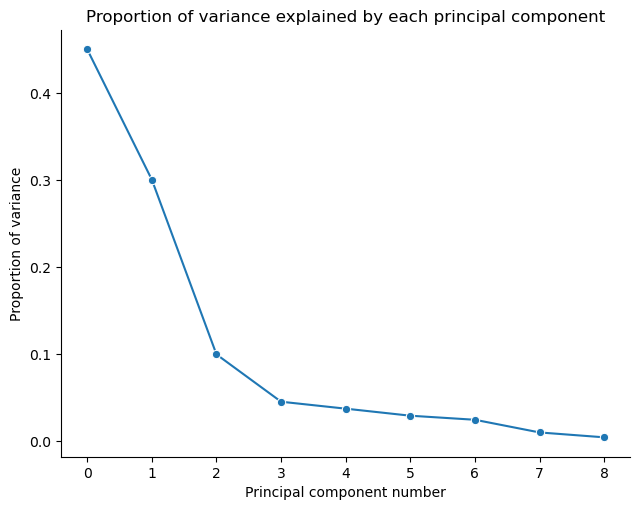

In [29]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

# Add a column for the principal component index
explained_variance_array_df["Principal component index"] = range(len(explained_variance_array))

(
# Create a line chart with sns.relplot
sns.relplot(
    kind='line',
    data=explained_variance_array_df,
    x="Principal component index",
    y="Variance explained",
    marker='o',
    aspect=1.3)
# Set the title of the plot
.set(title="Proportion of variance explained by each principal component")
# Set the axis labels
.set_axis_labels("Principal component number", "Proportion of variance")
);

Just like the elbow method used to determine the optimal number of clusters for k-means clustering, we are looking for a point where the decrease in variance levels off. This point, known as the elbow point, marks the point at which the explained variance starts to reduce significantly.

In [30]:
# Set the variable elbow to where you believe the elbow is
elbow = 3

Let's make a DataFrame containing these principle components

In [31]:
# Create a PCA object with {elbow} principal components
# We add 1 as the principal components start at 0 and not 1
pca_elbow = PCA(n_components=elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_elbow_df

,,pca0,pca1,pca2,pca3
name,html,,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.237243,-0.506632,-0.271606,0.526968
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,-0.210541,-0.386668,0.092842,-0.170832
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,-0.330790,-0.473940,0.285174,-0.004901
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.382249,-0.817310,-0.077702,0.107106
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.441013,-0.755697,-0.165229,-0.074260
...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,1.109831,-0.124585,-0.115768,-0.071955
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.912219,-0.221587,-0.321282,-0.086268
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,1.406071,0.005323,-0.027787,-0.075245


Let's compare the clusters made when using PCA to when not using PCA.
> It's helpful to demonstrate this on a small dataset so you can easily grasp the concept of PCA before scaling up. However, it's unlikely we'll see a dramatic difference, if any, on such a small dataset. This is normal, and you shouldn't worry about it. As long as you understand the principle of what's happening, this will help you throughout the bootcamp as you learn about machine learning on larger datasets.

In [32]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 35, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(pca_elbow_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our clusters_df DataFrame
clusters_df[f"PCA - {elbow}"] = clusters

clusters_df

,,Base model,PCA - 3
name,html,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,18,25
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,23,6
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,28,7
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,25,18
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,31,5
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,19,22
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,19,26
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,26,22


####4.1.2.&nbsp; Cumulative explained variance
Cumulative explained variance (CEV) is calculated by summing the explained variance of each principal component. The CEV plot shows how much variance is explained by each principal component, as well as the cumulative variance explained by all principal components up to that point.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


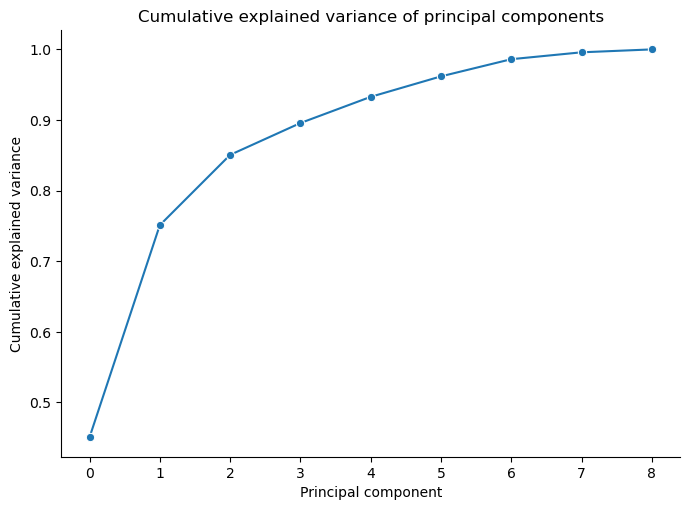

In [33]:
(
# Create a cumulative explained variance plot
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_variance_array)),  # Set the x-axis to be the principal component index
    y=np.cumsum(explained_variance_array),  # Set the y-axis to be the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot to be 1.4
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

We can also look for an elbow in the cumulative variance plot to determine how many principal components to retain. However, instead of doing that, we will set a cumulative variance threshold in the PCA constructor. This threshold tells scikit-learn how many principal components to retain. For example, 0.95 tells scikit-learn that we want to retain as many principle components as contain 95% or more of the variance.

In [34]:
# Create a PCA object
pca_variance = PCA(n_components=0.95)

Let's visualise this threshold

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


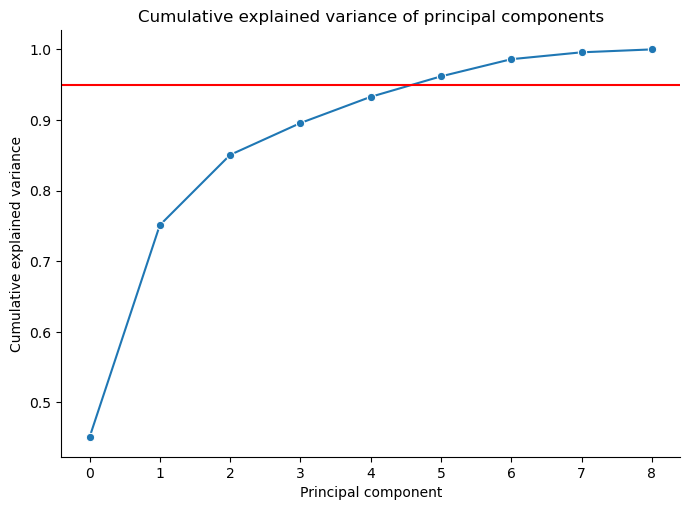

In [35]:
(
# Create a cumulative explained variance plot
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_variance_array)),  # Set the x-axis to be the principal component index
    y=np.cumsum(explained_variance_array),  # Set the y-axis to be the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot to be 1.4
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y=0.95,
            color='red');

Let's apply this to our scaled data

In [36]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

,,pca0,pca1,pca2,pca3,pca4,pca5
name,html,,,,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.237243,-0.506632,-0.271606,0.526968,0.601342,0.200622
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,-0.210541,-0.386668,0.092842,-0.170832,0.019535,0.098333
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,-0.330790,-0.473940,0.285174,-0.004901,0.027263,-0.141709
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.382249,-0.817310,-0.077702,0.107106,0.215332,0.091806
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.441013,-0.755697,-0.165229,-0.074260,-0.002093,0.088587
...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,1.109831,-0.124585,-0.115768,-0.071955,-0.017395,-0.075191
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.912219,-0.221587,-0.321282,-0.086268,-0.042533,-0.112657
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,1.406071,0.005323,-0.027787,-0.075245,-0.024332,-0.156505


Great! Now we can view the clusters created by this model alongside our baseline and elbow clusters.

In [37]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 35, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(pca_variance_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our clusters_df DataFrame
clusters_df["PCA - 0.95"] = clusters

clusters_df

,,Base model,PCA - 3,PCA - 0.95
name,html,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,18,25,19
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,23,6,2
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,28,7,18
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,25,18,25
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,31,5,13
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,19,22,1
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,19,26,28
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,26,22,1


As mentioned earlier, it's unlikely you'll see much difference, if any, here, since small datasets typically have less noise and fewer columns to remove.

###4.2.&nbsp; Using PCA on a bigger dataset
Let's look at how useful PCA can be as your datasets get bigger

Sklearn `make_blobs` creates artificial datasets with distinct clusters. Specifically, it creates a specified number of clusters, each with a defined center and standard deviation, and generates a set of random data points around these cluster centers.

In [38]:
X, _ = make_blobs(n_samples=1000,
                  n_features=80,
                  centers=35,
                  random_state=123)

blobs_df = pd.DataFrame(X)

blobs_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-4.223751,-2.275006,0.438350,-6.877219,0.197449,-4.153407,8.630454,-2.212642,-7.367113,-10.243816,...,10.346344,4.710415,5.683442,6.464020,7.668874,7.359057,-3.369078,-7.296006,-4.892164,-5.438267
1,-9.253962,3.051569,-7.673088,8.336667,2.721996,6.800822,-6.975005,8.264235,-2.139314,2.086846,...,-6.194170,10.052997,-5.379186,-3.406048,6.859516,1.871817,-0.555110,-7.149040,4.834891,-4.798911
2,-0.114183,4.011643,2.630619,-7.466895,0.405191,8.878062,-3.487070,7.544636,4.050397,1.003096,...,-6.020305,-6.944932,-5.228725,7.360029,7.082023,-9.157135,-4.720836,10.099441,0.493660,1.805103
3,3.786993,0.421435,-4.239356,-1.776005,-3.838160,-0.261109,4.941869,2.713822,1.057107,8.257984,...,-3.725329,-4.833787,-3.326616,1.581604,1.239005,0.854119,6.956567,7.454409,5.455001,3.407619
4,-0.104850,-8.578361,-9.275847,2.798172,8.006867,9.479158,-3.349803,9.204208,6.354144,-1.956063,...,9.026823,6.398037,3.017938,5.480655,-6.689278,-2.486289,-1.944685,-9.348873,-8.768207,-10.708018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.437712,-9.410439,5.558899,0.767731,6.677973,-0.003875,-9.658829,-8.061932,5.490156,-0.183037,...,-1.660387,-4.322568,-2.743064,8.066405,-0.323744,4.744018,-2.344988,11.963030,2.439658,-6.849531
996,-8.159944,2.643329,-6.185779,7.530740,3.328433,8.220319,-9.359562,10.771196,-3.353305,-0.278547,...,-4.467844,11.765749,-4.001798,-3.169193,7.568903,2.207414,-1.836940,-6.167859,7.221795,-3.701932
997,-8.403073,3.140560,-5.760196,7.534310,3.237318,6.355887,-9.623804,10.776332,-2.448165,1.344662,...,-5.816183,8.663757,-6.699188,-2.768261,5.881608,1.202149,0.300552,-6.655315,4.584641,-5.206742
998,2.886171,-0.491808,1.073096,-3.774735,2.383524,-9.234609,-7.344541,6.318974,-9.295658,9.756252,...,3.022588,8.606915,-0.034281,5.526336,-9.282426,6.196993,9.635727,-2.588381,4.503000,7.871503


Scale our created data

In [39]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler()

# Use the transformer to transform the data
scaled_blobs_df = my_min_max.fit_transform(blobs_df)

Perform PCA on our scaled data

In [40]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_blobs_df)

PCA()

Extract the explained variance for each Principal Component

In [41]:
explained_blobs_variance_array = pca.explained_variance_ratio_

Plot the cumulative sum of the extracted variances

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


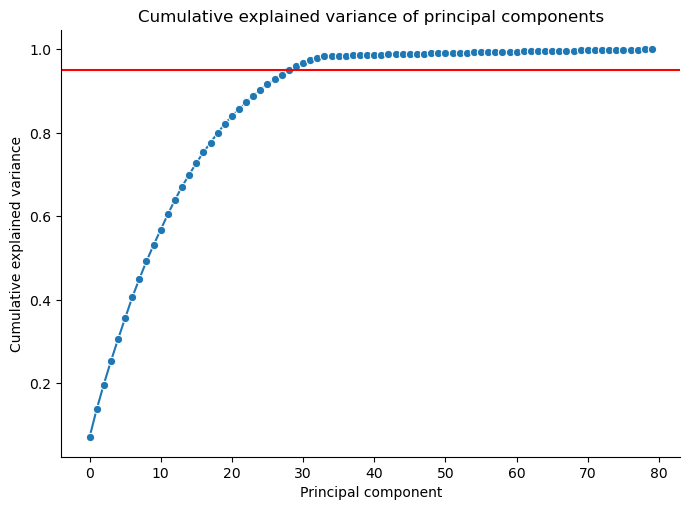

In [42]:
(
# Create a cumulative explained variance plot
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_blobs_variance_array)),  # Set the x-axis to be the principal component index
    y=np.cumsum(explained_blobs_variance_array),  # Set the y-axis to be the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot to be 1.4
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y=0.95,
            color='red');

Find out how many components make up 95% of the variance

In [43]:
# Calculate the cumulative sum
cumulative_sum = np.cumsum(explained_blobs_variance_array)

# Find the index where the cumulative sum reaches 0.95
index = np.searchsorted(cumulative_sum, 0.95)

# Print the number of components required to reach 0.95 variance
print(index + 1)

29


In this example, we were able to successfully reduce an 80-dimensional dataset to a more manageable 26-dimensional representation. This significant reduction in dimensionality not only helps to minimize noise but also substantially improves training times.

In [44]:
clusters_df

,,Base model,PCA - 3,PCA - 0.95
name,html,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,18,25,19
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,23,6,2
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,28,7,18
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,25,18,25
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,31,5,13
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,19,22,1
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,19,26,28
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,26,22,1


In [54]:
playlist = clusters_df.loc[clusters_df['PCA - 0.95']==6
               ].copy()
playlist.sample(10)

,,Base model,PCA - 3,PCA - 0.95
name,html,,,
My Kiss,https://open.spotify.com/track/4sXcFVHLvo9D0NRgAf80v4,6,9,6
Holy Water - Church Sessions,https://open.spotify.com/track/2wkiIDEXYJUels0HbBkpvl,31,31,6
Who's Sorry Now,https://open.spotify.com/track/4bzvhZFlV9UqQ3EmV2i8s4,31,25,6
7 rings,https://open.spotify.com/track/14msK75pk3pA33pzPVNtBF,6,9,6
Sixteen Tons,https://open.spotify.com/track/3P6OwCX7Ofiaaqtvujb6i5,31,18,6
Kiss from a Rose,https://open.spotify.com/track/0z5E34e7ZT3XKMYQNXh6tH,12,31,6
Time After Time,https://open.spotify.com/track/1Jj6MF0xDOMA3Ut2Z368Bx,6,9,6
The Storms Are On The Ocean,https://open.spotify.com/track/7cFr7zLBuMKTOXCaqtPZKV,12,9,6
Summertime,https://open.spotify.com/track/09g9OlH3RDjbffMAnvBPgw,31,25,6
